In [1]:
%matplotlib inline
%config InlineBackend.figure_format = True
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
import astropy.units as u
from rms import STSP, LightCurve, Star, Spot

In [2]:
spot_contrast = 0.7 # 0 -> perfectly dark; 1 -> same as photosphere
rotation_period = 30 # days
inc_stellar = 90 # Tilt of stellar rotation axis away from observer

star = Star(rotation_period, inc_stellar, spot_contrast)

start_time = Time('2009-01-01 00:00')
end_time = start_time + rotation_period * u.day
duration = end_time - start_time
time_steps = 30*u.min

times = start_time + np.arange(0, duration.to(u.day).value, 
                               time_steps.to(u.day).value) * u.day

In [63]:
n_spots = 30
random_radii = 0.1 * np.random.rand(n_spots)**3
spots = [Spot.at_random_position(radius=r) for r in random_radii]

In [64]:
with STSP(times, star, spots) as stsp: 
    lc = stsp.generate_lightcurve(n_ld_rings=5)

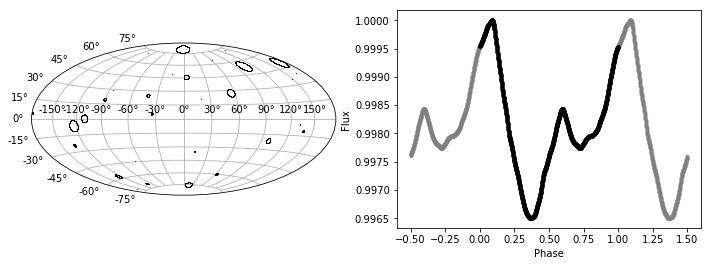

In [65]:
fig = plt.figure(figsize=(12, 4))
ax_star_map = fig.add_subplot(121, projection='hammer')
ax_lightcurve = fig.add_subplot(122)

for spot in spots:
    spot.plot(ax=ax_star_map)
ax_star_map.grid()

lc.plot(star, ax=ax_lightcurve)

In [ ]:
inverse_transform

(array([   6.,   70.,  184.,  181.,   41.,   37.,  121.,  221.,  123.,   16.]),
 array([-34.76506122, -28.06293412, -21.36080702, -14.65867992,
         -7.95655282,  -1.25442572,   5.44770138,  12.14982849,
         18.85195559,  25.55408269,  32.25620979]),
 <a list of 10 Patch objects>)

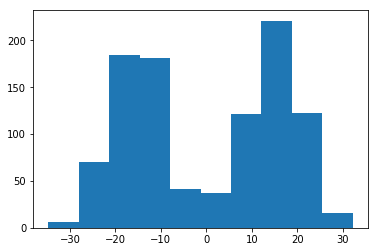

In [90]:
def sunspot_distribution(latitude): 
    return np.exp(-0.5 * (abs(latitude) - 15)**2 / 6**2)

def sunspot_inverse_transform(x): 
    lats = np.linspace(-60, 60, 1000)
    prob = np.cumsum(sunspot_distribution(lats))
    prob /= np.max(prob)
    return np.interp(x, prob, lats)

def draw_sunspots(n):
    return sunspot_inverse_transform(np.random.rand(n))

plt.hist(inverse_transform(np.random.rand(1000)))

In [ ]:
lat = 
lon = 2*np.pi * np.random.rand(len(lat))

plt.hist()